In [129]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import  KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [130]:
df=pd.read_csv('A:/ML/ML dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [131]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking null values

In [132]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
df1=df.copy()

In [134]:
df1.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


### Data profiling

In [135]:
profile = pp.ProfileReport(df1)


In [136]:
profile

AttributeError: module networkx has no attribute topological_generations

#### From above report we can see '0' values in gulcose,BP,Skin thickness,Insulin,BMI. These are missing values & We want to replace  

In [137]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [138]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [139]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [140]:
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(),inplace=True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(),inplace=True)
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df1['BMI'].fillna(df1['BMI'].median(),inplace=True)

In [141]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### correlation

In [142]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


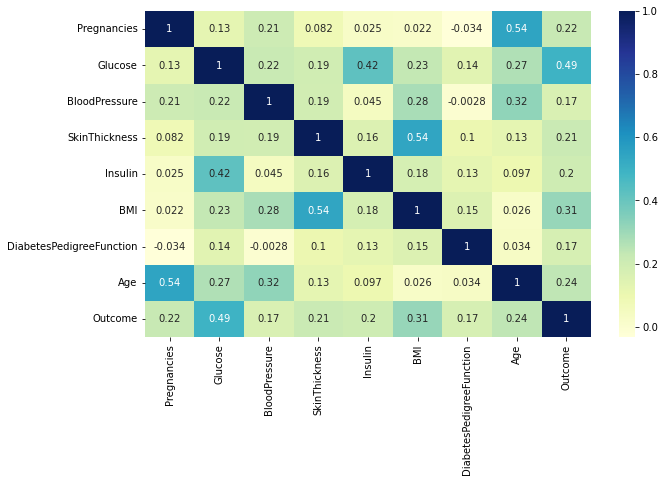

In [143]:
plt.figure(figsize=(10,6))
a=sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

In [144]:
x=df1.drop(['Outcome'],axis=1)
y=df1['Outcome']

In [145]:
x.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21


In [146]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

### Train & Test data

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
x_train.shape

(576, 8)

In [148]:
x_test.shape

(192, 8)

In [149]:
y_train.shape

(576,)

In [150]:
y_test.shape

(192,)

### Standardization

In [151]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [152]:
X_train

array([[ 0.04853303,  1.54123267, -0.05398721, ...,  1.66662218,
         0.05370085, -0.62107929],
       [ 0.64332082, -0.46320229, -2.33852673, ..., -1.22673439,
         1.07195276,  0.14350752],
       [ 0.94071471,  2.33664337,  1.41464535, ...,  1.1056653 ,
        -0.03166159,  0.65323206],
       ...,
       [-0.24886086, -0.20867086,  0.10919419, ..., -0.88720785,
        -1.08040009, -0.79098747],
       [-0.84364865, -1.09953084, -3.4807965 , ...,  3.34949284,
         0.10552804, -0.62107929],
       [ 0.34592693, -0.84499942,  0.10919419, ...,  0.19041985,
         1.63290591,  0.82314024]])

### model
### 1) KNN


In [83]:
knn=KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [84]:
y_pred = knn.predict(X_test)

In [85]:
print(confusion_matrix(y_test,y_pred))

[[109  12]
 [ 42  29]]


In [100]:
print(accuracy_score(y_test,y_pred))

0.71875


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       121
           1       0.71      0.41      0.52        71

    accuracy                           0.72       192
   macro avg       0.71      0.65      0.66       192
weighted avg       0.72      0.72      0.70       192



### chossing k value

In [31]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    

Text(0, 0.5, 'error_rate')

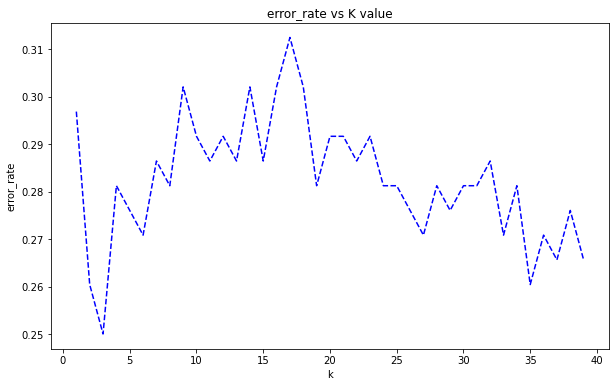

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed')
plt.title('error_rate vs K value')
plt.xlabel('k')
plt.ylabel('error_rate')

In [33]:
knn.score(X_test,y_test)

0.734375

### Random forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [95]:
pred=rfc.predict(X_test)

In [96]:
print(confusion_matrix(y_test,pred))

[[110  11]
 [ 34  37]]


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       121
           1       0.77      0.52      0.62        71

    accuracy                           0.77       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.77      0.75       192

